# Heading


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path ='/home/nrw/Documents/projects_Spring2018/howe299r/Experiments/26Mar2018/data/deltas/'
viz = '02April.csv'
imu = '02IMU.csv'
vizf = pd.read_csv(path+viz,sep='\t')
vizf.dropna(how="all", inplace=True) 
imuf = pd.read_csv(path+imu,sep='\t')
imuf.dropna(how="all", inplace=True) 

yaw, pitch, roll = vizf["yaw"], vizf["pitch"], vizf["roll"]
yaw, pitch, roll = vizf["yaw"]*57.29578, vizf["pitch"]*57.29578, vizf["roll"]*57.29578
xIMU,yIMU,zIMU = imuf["x"], imuf["y"], imuf["z"]

forces = np.arange(0,yaw.shape[0]*10,10)

#print(len(yaw))
#print(len(yIMU))
#print(yIMU)
#print(roll)
#print(pitch)
#print(len(forces))

8
8
0   -0.4375
1   -1.0625
2   -1.8750
3   -2.6875
4   -3.7500
5   -4.5625
6   -5.8125
7   -6.1250
Name: y, dtype: float64
8


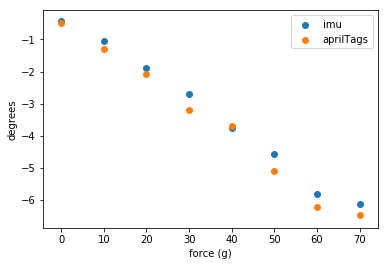

In [47]:
plt.scatter(forces, yIMU, label='imu')
plt.scatter(forces, yaw, label='aprilTags')
plt.ylabel('degrees')
plt.xlabel('force (g)')
plt.legend()
plt.show()

In [31]:
import numpy as np
import plotly.plotly as py
import plotly.offline as po
import plotly.graph_objs as go
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

po.init_notebook_mode(connected=True)

trace0 = go.Scatter( x = forces, y = yIMU, mode = 'markers',
    name = 'degrees (by IMU)' )

trace1 = go.Scatter( x = forces, y = yaw, mode = 'markers',
    name = 'true degrees (by apriltag)' )


forces = forces.reshape(-1, 1)
myX = forces
myy = yIMU 
#regr= Ridge(fit_intercept=True, alpha=1.0, random_state=0, normalize=True)
regr = linear_model.LinearRegression()
regr.fit(myX, myy)
coef_ridge = regr.coef_
gridx = np.linspace(myX.min(), myX.max(), 20)
coef_ = regr.coef_ * gridx + regr.intercept_
yPred= regr.predict(myX) 
#plt.plot(gridx, coef_, 'g-', label="ridge regression")

trace2 = go.Scatter( x= gridx, y = coef_,
    name = 'linear fit (w/ridge penalty)' )
           

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
data = [trace1, trace0, trace2]

layout = go.Layout(
    title='Force vs Degrees of Deflection',
    yaxis=dict(title='degrees'),
    xaxis=dict(title='Force (in grams)'),
    legend=dict(x=.1, y=-.5) )

fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(yIMU, yPred))
print('Variance score (ideal 1): %.2f' % r2_score(yIMU, yPred)) 
iplot(fig)
#po.plot(fig, filename='temp_plot.html')

Coefficients: 
 [-0.07849702]
Mean squared error: 0.08
Variance score (ideal 1): 0.98


In [27]:
resid = yIMU - yPred
layout = go.Layout(
    title='Force vs Degrees of Deflection',
    yaxis=dict(title='degrees'),
    xaxis=dict(title='Force (in grams)'),
    legend=dict(x=.1, y=-.5) )
traceResid = go.Scatter( x = yIMU, y = resid, mode = 'markers',
    name = 'resid' )
data = [traceResid]
layout = go.Layout(
    title='Residuals',
    yaxis=dict(title='residuals'),
    xaxis=dict(title='yIMU (degrees)'),
    legend=dict(x=.1, y=-.5) )

fig = go.Figure(data=data, layout=layout)
iplot(fig)